Import important libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

**LOAD DATA**
1. Load each data, check on summarry statistics
2. check on data types and distribution


Load the imdb.title.basics.csv data

In [270]:
movies = pd.read_csv('imdb.title.basics.csv')

In [271]:
movies.shape

(146144, 6)

the file imdb.title.basics.csv has 146,144 rows and six columns
Check the keys and the values of the first five rows

In [272]:
movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [273]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


convert start_year to object

In [10]:
movies['start_year'] = movies['start_year'].astype('object')

In [52]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  object 
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.7+ MB


- The only numerica variable is runtime_minutes which has a range of 1 to 51420 minutes with a mean of 86 minutes
- There are no duplicates but 22, 31739 and 5408  missing values in the original_title, runtime_minutes and genres respectively

In [53]:
movies.describe()

,runtime_minutes
count,114405.000000
mean,86.187247
std,166.360590
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


In [54]:
movies.dtypes

,0
tconst,object
primary_title,object
original_title,object
start_year,object
runtime_minutes,float64
genres,object


In [55]:
movies.duplicated().sum()

np.int64(0)

In [56]:
movies.isnull().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


In [274]:
movies['primary_title'].fillna(movies['original_title'])
movies['original_title'].fillna(movies['primary_title'])
movies['genres'].fillna('Unknown')

,genres
0,"Action,Crime,Drama"
1,"Biography,Drama"
2,Drama
3,"Comedy,Drama"
4,"Comedy,Drama,Fantasy"
...,...
146139,Drama
146140,Documentary
146141,Comedy
146142,Unknown


In [275]:
movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [276]:
print("Max runtime:", movies['runtime_minutes'].max())
print("Movies longer than 500 minutes:")
print(movies[movies['runtime_minutes'] > 500][['primary_title','runtime_minutes']].head(10))

Max runtime: 51420.0
Movies longer than 500 minutes:
                     primary_title  runtime_minutes
6311                A Time to Stir           1320.0
12974       City of Eternal Spring           3450.0
15381                 Deregulation           4200.0
15796  How Does David Lynch Do It?           1800.0
18210              American Fencer            761.0
18999               Hollywood East           1800.0
20925     World Peace & Prayer Day           2400.0
21545      Azgrab: The Documentary           1669.0
21816    A História de João e Zeca            605.0
22127                Saving Julian            840.0


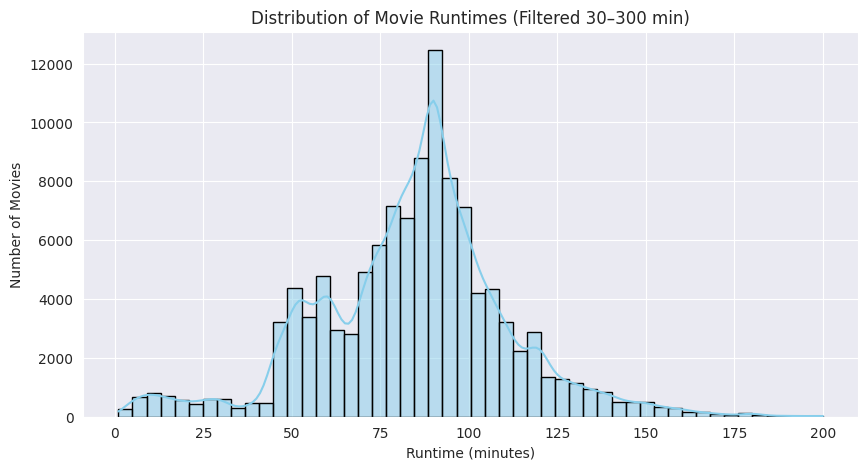

In [277]:
plt.figure(figsize=(10,5))
sns.histplot(movies[movies['runtime_minutes'].between(0, 200)]['runtime_minutes'],
             bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Movie Runtimes (Filtered 30–300 min)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [285]:
movies['start_year'].min(),movies['start_year'].max()

(2010, 2115)

In [287]:
movies['start_year'] = pd.to_numeric(movies['start_year'], errors='coerce')

print(movies_per_year.head())


   start_year  count
0        2010  11849
1        2011  12900
2        2012  13787
3        2013  14709
4        2014  15589


In [317]:
movies['start_year'].value_counts()

,count
start_year,
2017,17504
2016,17272
2018,16849
2015,16243
2014,15589
2013,14709
2012,13787
2011,12900
2010,11849


In [313]:
movies_filtered = movies[movies['start_year'].between(2010, 2025)]
yearly_counts = movies_filtered['start_year'].value_counts()

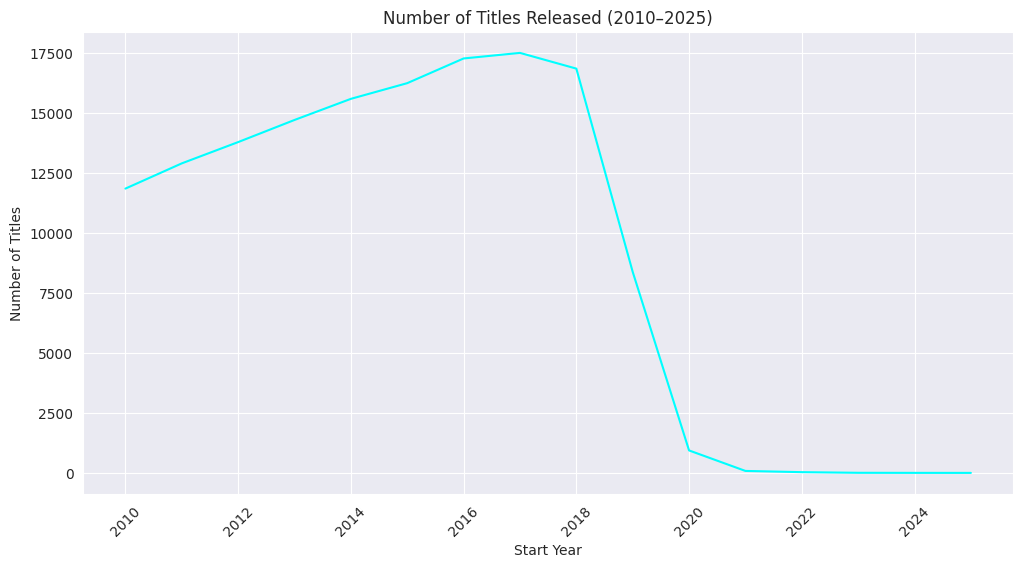

In [315]:
yearly_counts = yearly_counts

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, color='cyan')

plt.title('Number of Titles Released (2010–2025)')
plt.xlabel('Start Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

More movies were produced between 2010 and 2019 with majority being produced in 2017

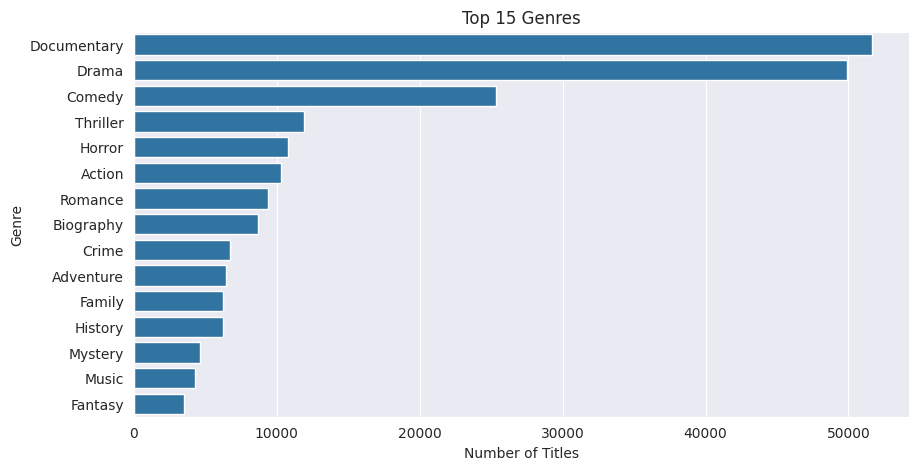

In [278]:
top_genres = movies['genres'].dropna().str.split(',').explode().value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 15 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [ ]:
According to the movies data, Documentary, Drama and comedy were the highest produced

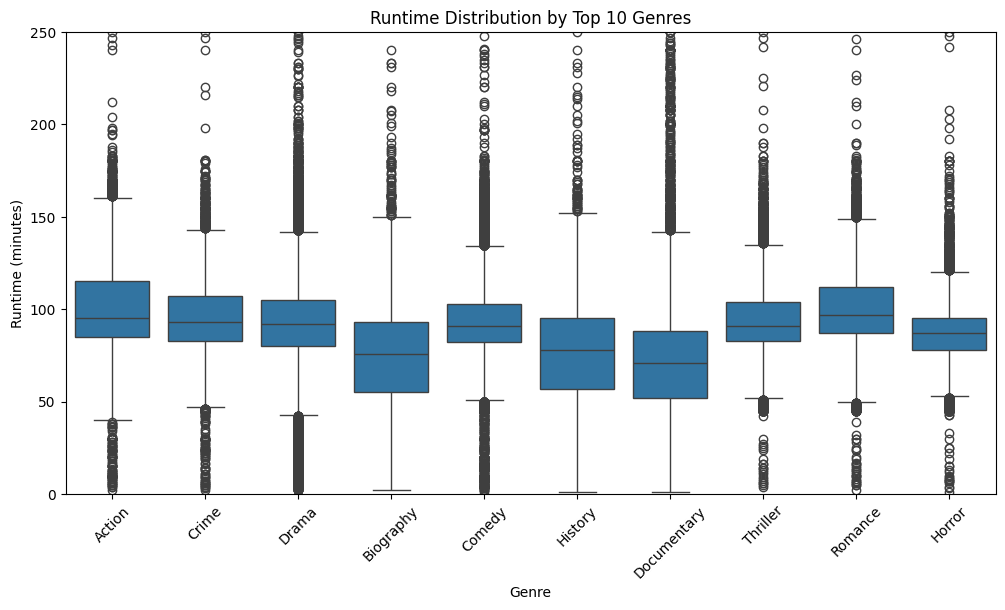

In [20]:
movies_genres = movies.dropna(subset=['genres', 'runtime_minutes']).copy()
movies_genres = movies_genres.assign(genre=movies_genres['genres'].str.split(',')).explode('genre')

top_genres = movies_genres['genre'].value_counts().head(10).index
movies_top_genres = movies_genres[movies_genres['genre'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='runtime_minutes', data=movies_top_genres)
plt.xticks(rotation=45)
plt.ylim(0, 250)
plt.title('Runtime Distribution by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()

On checking the best ten genres, there are so many outliers indicating the need of data cleaning

In [318]:
movies.duplicated(subset=['tconst']).sum()

np.int64(0)

In [319]:
genres_expanded = movies['genres'].str.split(',').explode()

**IMBD RATINGS**
1. load imdb-ratings data and explore

In [134]:
ratings = pd.read_csv('imdb.ratings.csv')
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
ratings.shape

(73856, 3)

In [26]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


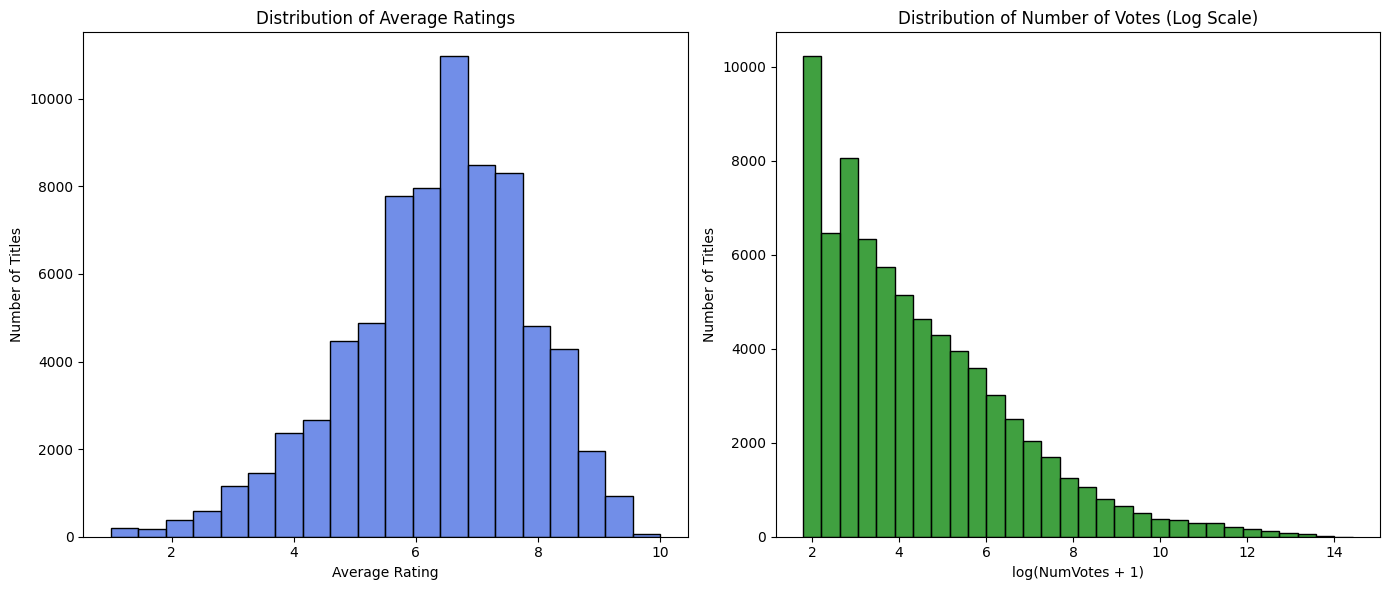

In [126]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(ratings['averagerating'], bins=20, color='royalblue', edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Titles')

plt.subplot(1,2,2)
sns.histplot(np.log1p(ratings['numvotes']), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Number of Votes (Log Scale)')
plt.xlabel('log(NumVotes + 1)')
plt.ylabel('Number of Titles')

plt.tight_layout()
plt.show()

In [28]:
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [29]:
ratings.dtypes

,0
tconst,object
averagerating,float64
numvotes,int64


In [97]:
ratings.duplicated().sum()

np.int64(0)

In [98]:
ratings.isnull().sum()

,0
tconst,0
averagerating,0
numvotes,0


In [140]:
corr = ratings[['averagerating','numvotes']].corr()

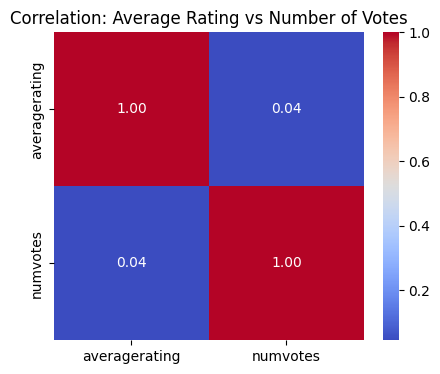

In [133]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation: Average Rating vs Number of Votes')
plt.show()

***BORN MOVIE GROSS***

In [136]:
gross = pd.read_csv('born.movie_gross.csv')
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [137]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [138]:
gross['year'] = gross['year'].astype('object')

In [139]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.4+ KB


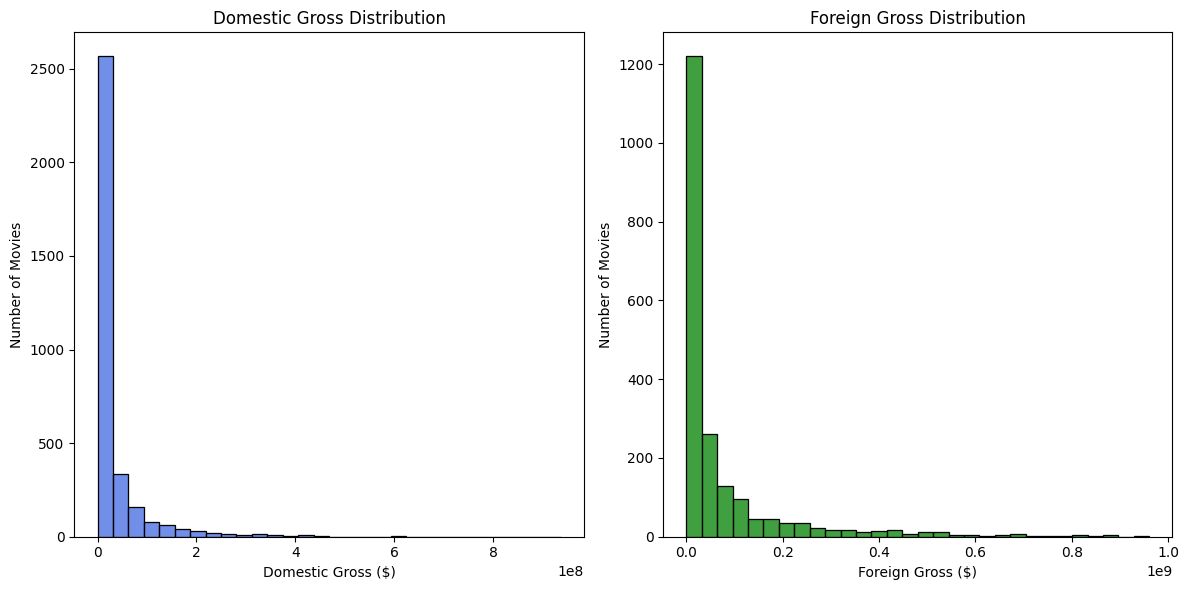

In [129]:
# Domestic gross histogram
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(gross['domestic_gross'].dropna(), bins=30, color='royalblue')
plt.title('Domestic Gross Distribution')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Number of Movies')

plt.subplot(1,2,2)
sns.histplot(gross['foreign_gross'].dropna(), bins=30, color='green')
plt.title('Foreign Gross Distribution')
plt.xlabel('Foreign Gross ($)')
plt.ylabel('Number of Movies')

plt.tight_layout()
plt.show()

Transform the data for better view

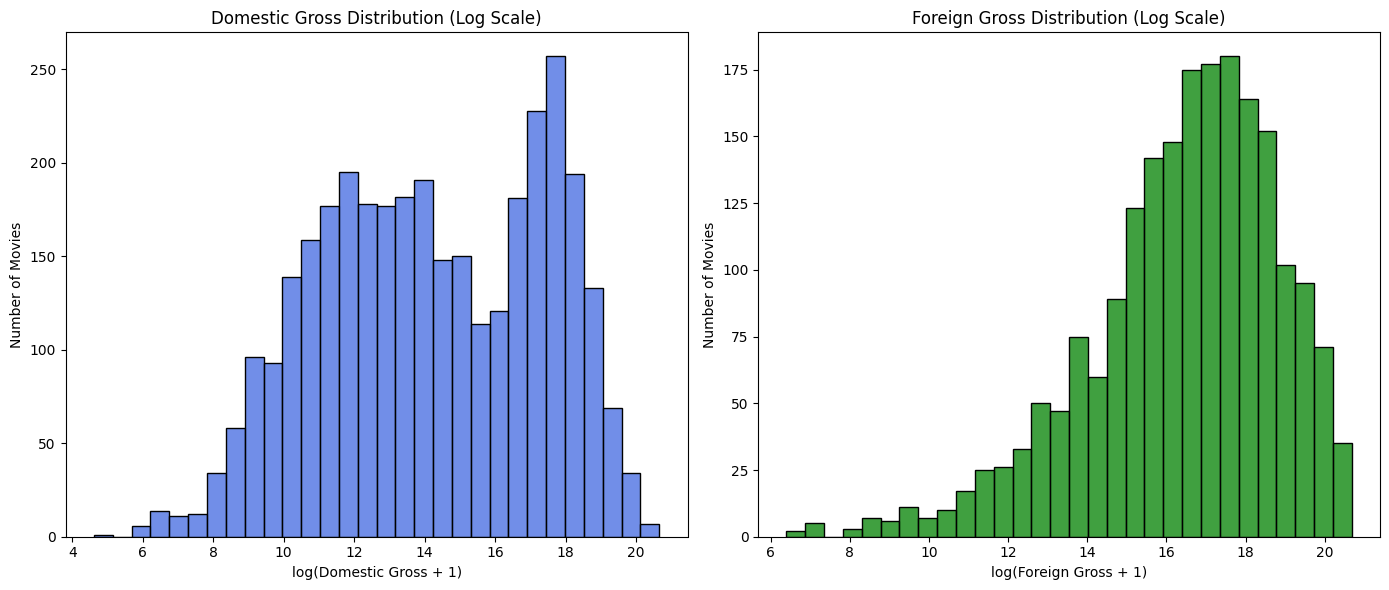

In [130]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(np.log1p(gross['domestic_gross'].dropna()), bins=30, color='royalblue')
plt.title('Domestic Gross Distribution (Log Scale)')
plt.xlabel('log(Domestic Gross + 1)')
plt.ylabel('Number of Movies')

plt.subplot(1,2,2)
sns.histplot(np.log1p(gross['foreign_gross'].dropna()), bins=30, color='green')
plt.title('Foreign Gross Distribution (Log Scale)')
plt.xlabel('log(Foreign Gross + 1)')
plt.ylabel('Number of Movies')

plt.tight_layout()
plt.show()

Correlations

In [141]:
corr = gross[['year', 'domestic_gross','foreign_gross']].corr()

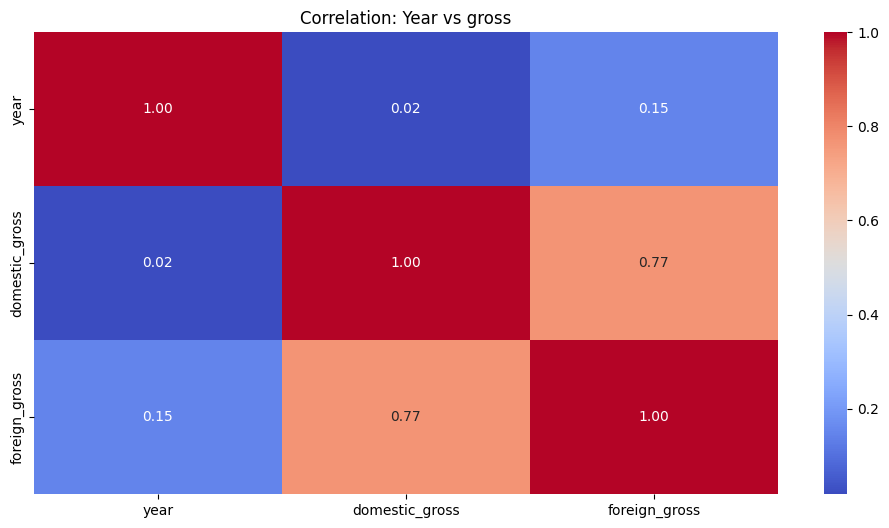

In [144]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation: Year vs gross')
plt.show()

**Combine the datasets**
1. combine the three datasets
2. first combine the movies data with the ratings data using the tconst identifier
3. Add the gross data using the primary_title and start_year
4. Explore the data
5. Clean the data
6. Visualize

In [149]:
movies = pd.read_csv('imdb.title.basics.csv')
ratings = pd.read_csv('imdb.ratings.csv')
gross = pd.read_csv('born.movie_gross.csv')

In [151]:
movies['start_year'] = movies['start_year'].astype('object')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  object 
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.7+ MB


In [152]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [153]:
imdb_movies = movies.merge(ratings, on="tconst", how="left")
imdb_movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [154]:
imdb_movies.keys()

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [155]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  object 
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), object(5)
memory usage: 8.9+ MB


In [156]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [158]:
gross = gross.rename(
    columns={
        'title': 'primary_title',
        'year': 'start_year'
    }
)

print(gross.head())

                                 primary_title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  start_year  
0    652000000.0        2010  
1    691300000.0        2010  
2    664300000.0        2010  
3    535700000.0        2010  
4    513900000.0        2010  


In [160]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   start_year      3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [161]:
gross['start_year'] = gross['start_year'].astype('object')
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   start_year      3387 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.4+ KB


In [181]:
gross[['domestic_gross', 'foreign_gross']]

,domestic_gross,foreign_gross
0,415000000.0,652000000.0
1,334200000.0,691300000.0
2,296000000.0,664300000.0
3,292600000.0,535700000.0
4,238700000.0,513900000.0
...,...,...
3382,6200.0,NaN
3383,4800.0,NaN
3384,2500.0,NaN
3385,2400.0,NaN


In [169]:
gross.isnull().sum()

,0
primary_title,0
studio,5
domestic_gross,28
foreign_gross,1350
start_year,0


In [182]:
gross_cleaned = gross.dropna(subset=['foreign_gross'])

print("Original shape:", gross.shape)
print("After dropping missing gross values:", gross_cleaned.shape)
print(gross_cleaned.head())


Original shape: (3387, 7)
After dropping missing gross values: (2037, 7)
                                 primary_title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross start_year  domestic_gross_million  foreign_gross_million  
0    652000000.0       2010                   415.0                  652.0  
1    691300000.0       2010                   334.2                  691.3  
2    664300000.0       2010                   296.0                  664.3  
3    535700000.0       2010                   292.6                  535.7  
4    513900000.0       2010                   238.7                  513.9  


In [184]:
gross_cleaned['domestic_gross_million'] = gross_cleaned['domestic_gross'] / 1_000_000
gross_cleaned['foreign_gross_million'] = gross_cleaned['foreign_gross'] / 1_000_000

/tmp/ipython-input-3320742643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_cleaned['domestic_gross_million'] = gross_cleaned['domestic_gross'] / 1_000_000
/tmp/ipython-input-3320742643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_cleaned['foreign_gross_million'] = gross_cleaned['foreign_gross'] / 1_000_000


In [185]:
gross_cleaned[['domestic_gross_million', 'domestic_gross_million']]

,domestic_gross_million,domestic_gross_million
0,415.0000,415.0000
1,334.2000,334.2000
2,296.0000,296.0000
3,292.6000,292.6000
4,238.7000,238.7000
...,...,...
3275,0.0014,0.0014
3286,0.7250,0.7250
3309,0.0100,0.0100
3342,0.0932,0.0932


In [186]:
gross_cleaned.head()

,primary_title,studio,domestic_gross,foreign_gross,start_year,domestic_gross_million,foreign_gross_million
0,Toy Story 3,BV,415000000.0,652000000.0,2010,415.0,652.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,334.2,691.3
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,296.0,664.3
3,Inception,WB,292600000.0,535700000.0,2010,292.6,535.7
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,238.7,513.9


In [187]:
gross_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 3353
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   primary_title           2037 non-null   object 
 1   studio                  2033 non-null   object 
 2   domestic_gross          2009 non-null   float64
 3   foreign_gross           2037 non-null   float64
 4   start_year              2037 non-null   object 
 5   domestic_gross_million  2009 non-null   float64
 6   foreign_gross_million   2037 non-null   float64
dtypes: float64(4), object(3)
memory usage: 191.9+ KB


In [188]:
df_gross = gross_cleaned.drop(['domestic_gross', 'foreign_gross'], axis=1)
df_gross.head()

,primary_title,studio,start_year,domestic_gross_million,foreign_gross_million
0,Toy Story 3,BV,2010,415.0,652.0
1,Alice in Wonderland (2010),BV,2010,334.2,691.3
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,296.0,664.3
3,Inception,WB,2010,292.6,535.7
4,Shrek Forever After,P/DW,2010,238.7,513.9


In [189]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   primary_title           2037 non-null   object 
 1   studio                  2033 non-null   object 
 2   start_year              2037 non-null   object 
 3   domestic_gross_million  2009 non-null   float64
 4   foreign_gross_million   2037 non-null   float64
dtypes: float64(2), object(3)
memory usage: 160.0+ KB


In [195]:
merged_df = imdb_movies.merge(df_gross, on=["primary_title","start_year"], how="left")
merged_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_million,foreign_gross_million
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN


In [196]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tconst                  146144 non-null  object 
 1   primary_title           146143 non-null  object 
 2   original_title          146122 non-null  object 
 3   start_year              146144 non-null  object 
 4   runtime_minutes         114405 non-null  float64
 5   genres                  140736 non-null  object 
 6   averagerating           73856 non-null   float64
 7   numvotes                73856 non-null   float64
 8   studio                  1277 non-null    object 
 9   domestic_gross_million  1269 non-null    float64
 10  foreign_gross_million   1279 non-null    float64
dtypes: float64(5), object(6)
memory usage: 12.3+ MB


In [199]:
merged_df.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross_million,foreign_gross_million
count,114405.000000,73856.000000,7.385600e+04,1269.000000,1279.000000
mean,86.187247,6.332729,3.523662e+03,60.995321,94.749388
std,166.360590,1.474978,3.029402e+04,86.932507,152.180771
min,1.000000,1.000000,5.000000e+00,0.000700,0.000600
25%,70.000000,5.500000,1.400000e+01,6.200000,7.200000
50%,87.000000,6.500000,4.900000e+01,32.400000,31.000000
75%,99.000000,7.400000,2.820000e+02,74.300000,103.250000
max,51420.000000,10.000000,1.841066e+06,700.100000,946.400000


**DATA CLEANING**
1. Checking missing values, dropping
2. Generate distribution graphs for numerical variables
3. Generate bar graphs for the distribution of movie ratings and top 10 genre
4. Generate boxplots for the top 10 genre

In [198]:
merged_df.isnull().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408
averagerating,72288
numvotes,72288
studio,144867
domestic_gross_million,144875


In [200]:
df_cleaned = merged_df.dropna()
print(df_cleaned.shape)

(1256, 11)


In [201]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 48 to 140826
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tconst                  1256 non-null   object 
 1   primary_title           1256 non-null   object 
 2   original_title          1256 non-null   object 
 3   start_year              1256 non-null   object 
 4   runtime_minutes         1256 non-null   float64
 5   genres                  1256 non-null   object 
 6   averagerating           1256 non-null   float64
 7   numvotes                1256 non-null   float64
 8   studio                  1256 non-null   object 
 9   domestic_gross_million  1256 non-null   float64
 10  foreign_gross_million   1256 non-null   float64
dtypes: float64(5), object(6)
memory usage: 117.8+ KB


In [202]:
df_cleaned.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_million,foreign_gross_million
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,0.744,8.000000
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58.200,129.900000
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26.300,26.900000
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652.300,0.001019
62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,FD,13.100,10.800000


In [203]:
df_cleaned.to_csv("Movies_df.csv")


In [204]:
df_cleaned.dtypes

,0
tconst,object
primary_title,object
original_title,object
start_year,object
runtime_minutes,float64
genres,object
averagerating,float64
numvotes,float64
studio,object
domestic_gross_million,float64


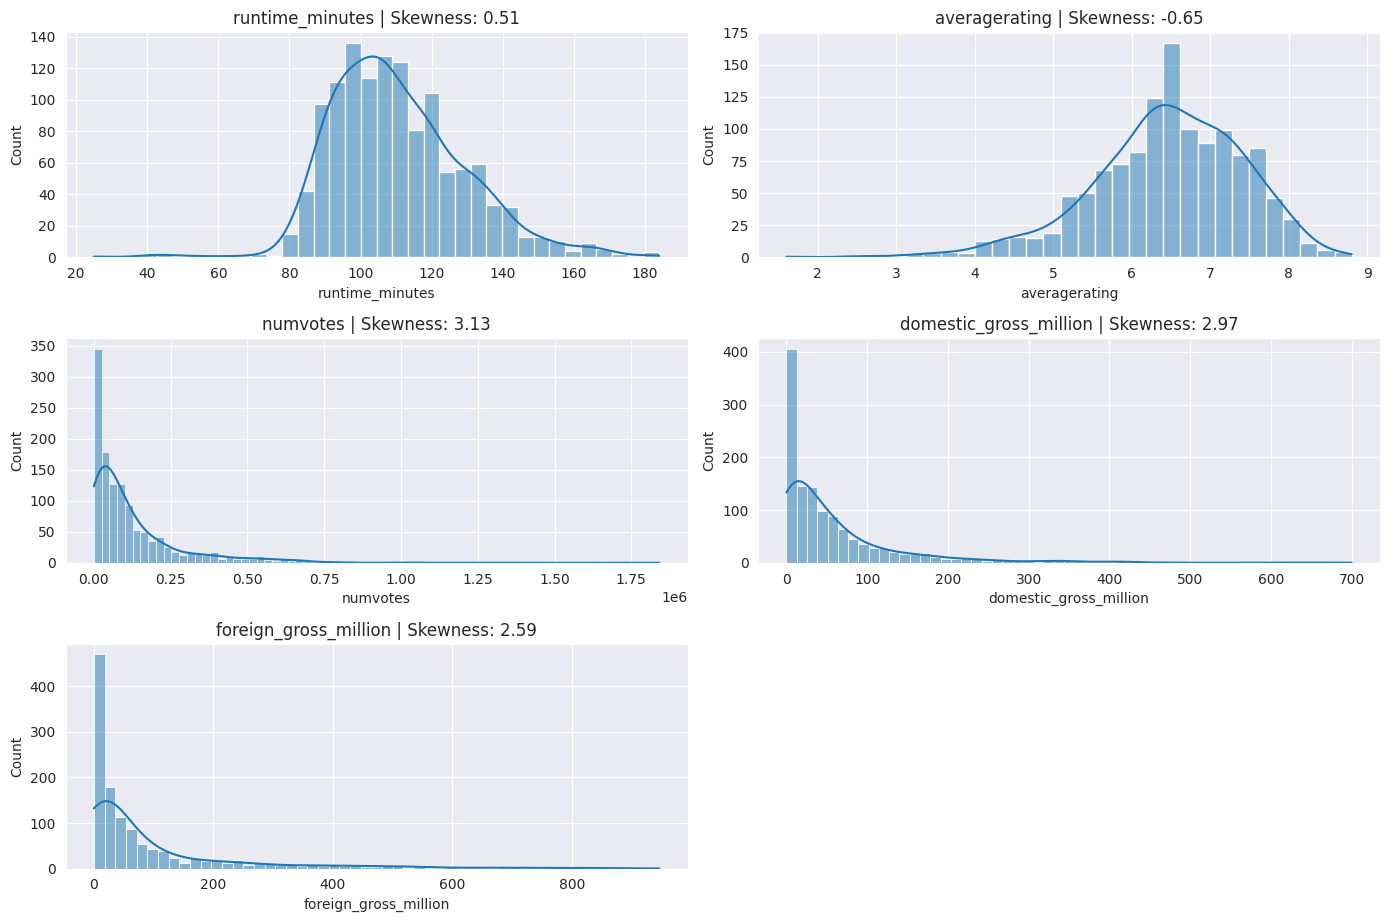

In [207]:
sns.set_style("darkgrid")

numerical_columns = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_cleaned[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [209]:
df_cleaned.to_csv(r"C:\Users\Joan Kimutai\Desktop\Python\Assignments\Independent Project 1\Movies_df_clean.csv", index=False)

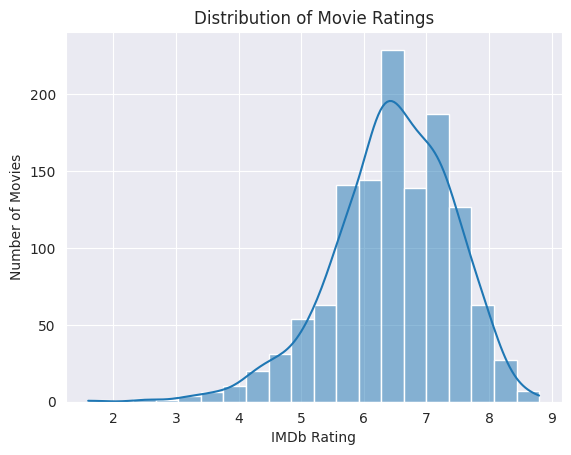

In [208]:
sns.histplot(df_cleaned['averagerating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.show()

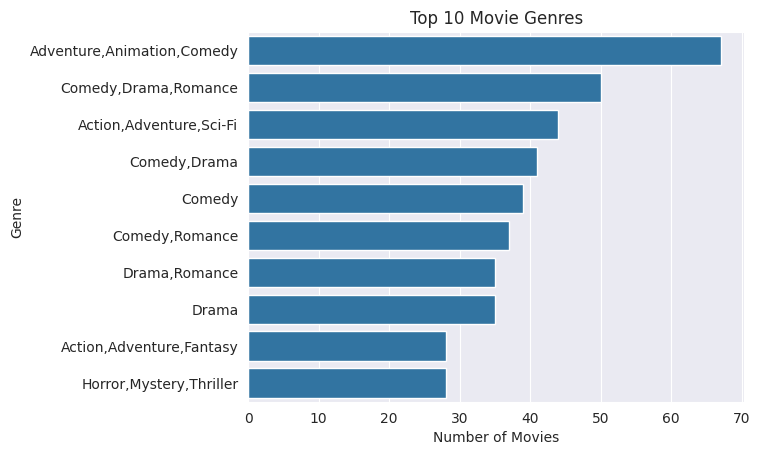

In [210]:
top_genres = df_cleaned['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

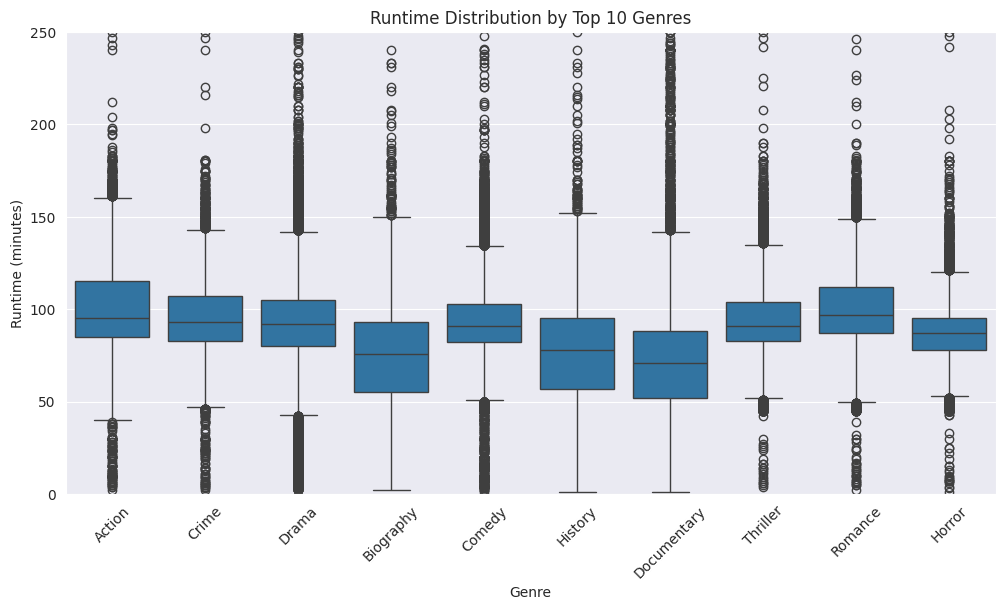

In [218]:
top_genres = movies_genres['genre'].value_counts().head(10).index
movies_top_genres = movies_genres[movies_genres['genre'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='runtime_minutes', data=movies_top_genres)
plt.xticks(rotation=45)
plt.ylim(0, 250)  # Optional: limit to avoid extreme outliers
plt.title('Runtime Distribution by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()

Further data cleaning
1. Removal of outliers
2. Generate distribution graphs for numerical variables
3. Generate bar graphs for the distribution of movie ratings and top 10 genre
4. Generate boxplots for the top 10 genre


In [226]:
numeric_cols = ['runtime_minutes', 'averagerating', 'numvotes',
                'domestic_gross_million', 'foreign_gross_million']

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Assign cleaned dataframe to a new variable
Clean_data = df.copy()

print("Clean_data shape:", Clean_data.shape)

Clean_data shape: (1110, 11)


In [227]:
Clean_data.to_csv(
    r"C:\Users\Joan Kimutai\Desktop\Python\Assignments\Independent Project 1\Movies_df_clean.csv",
    index=False
)

print("Clean data saved successfully!")

Clean data saved successfully!


In [228]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 48 to 140826
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tconst                  1110 non-null   object 
 1   primary_title           1110 non-null   object 
 2   original_title          1110 non-null   object 
 3   start_year              1110 non-null   object 
 4   runtime_minutes         1110 non-null   float64
 5   genres                  1110 non-null   object 
 6   averagerating           1110 non-null   float64
 7   numvotes                1110 non-null   float64
 8   studio                  1110 non-null   object 
 9   domestic_gross_million  1110 non-null   float64
 10  foreign_gross_million   1110 non-null   float64
dtypes: float64(5), object(6)
memory usage: 104.1+ KB


In [229]:
Clean_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_million,foreign_gross_million
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,0.744,8.000000
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58.200,129.900000
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26.300,26.900000
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652.300,0.001019
62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,FD,13.100,10.800000


In [244]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 48 to 140826
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tconst                  1110 non-null   object 
 1   primary_title           1110 non-null   object 
 2   original_title          1110 non-null   object 
 3   start_year              1110 non-null   object 
 4   runtime_minutes         1110 non-null   float64
 5   genres                  1110 non-null   object 
 6   averagerating           1110 non-null   float64
 7   numvotes                1110 non-null   float64
 8   studio                  1110 non-null   object 
 9   domestic_gross_million  1110 non-null   float64
 10  foreign_gross_million   1110 non-null   float64
dtypes: float64(5), object(6)
memory usage: 136.4+ KB


In [246]:
Clean_data.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross_million,foreign_gross_million
count,1110.000000,1110.000000,1.110000e+03,1110.000000,1110.000000
mean,108.982883,6.385405,9.587923e+04,39.753749,48.605860
std,18.070413,0.951295,1.167901e+05,50.557932,58.612625
min,25.000000,1.600000,6.000000e+00,0.000700,0.000600
25%,96.000000,5.800000,1.843525e+04,4.300000,6.300000
50%,107.000000,6.400000,5.890700e+04,26.300000,24.250000
75%,119.000000,7.100000,1.231220e+05,56.950000,67.850000
max,184.000000,8.800000,1.005960e+06,678.800000,249.800000


What is the runtime distribution?

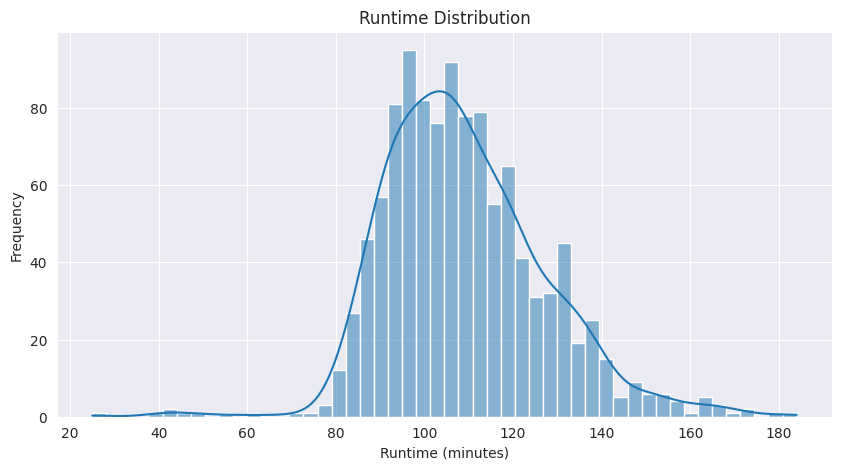

In [249]:
plt.figure(figsize=(10,5))
sns.histplot(Clean_data['runtime_minutes'].dropna(), bins=50, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

What is the year production trend of the movies

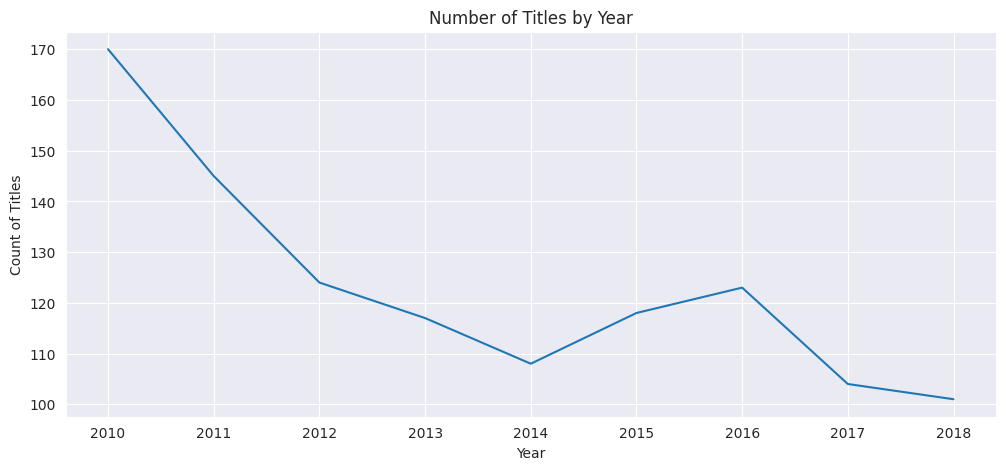

In [324]:
year_counts = Clean_data['start_year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Titles by Year')
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.show()



More titles were produced in 2010 followed by a sharp decline to 2014. There was a rise in movies titles between 2014 and 2016 then a downward trend up to 1018

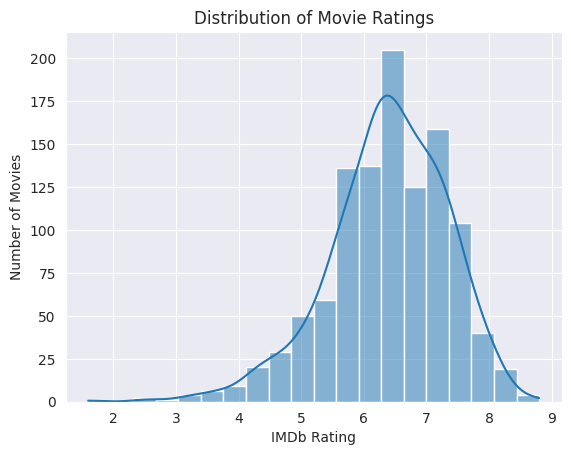

In [230]:
sns.histplot(Clean_data['averagerating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.show()

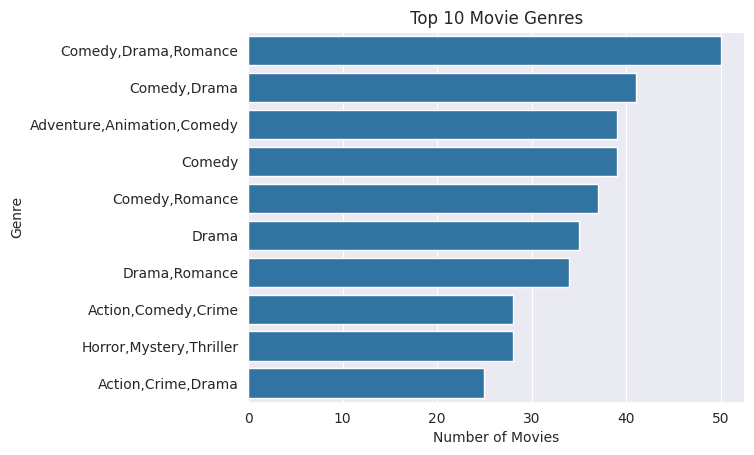

In [231]:
top_genres = Clean_data['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

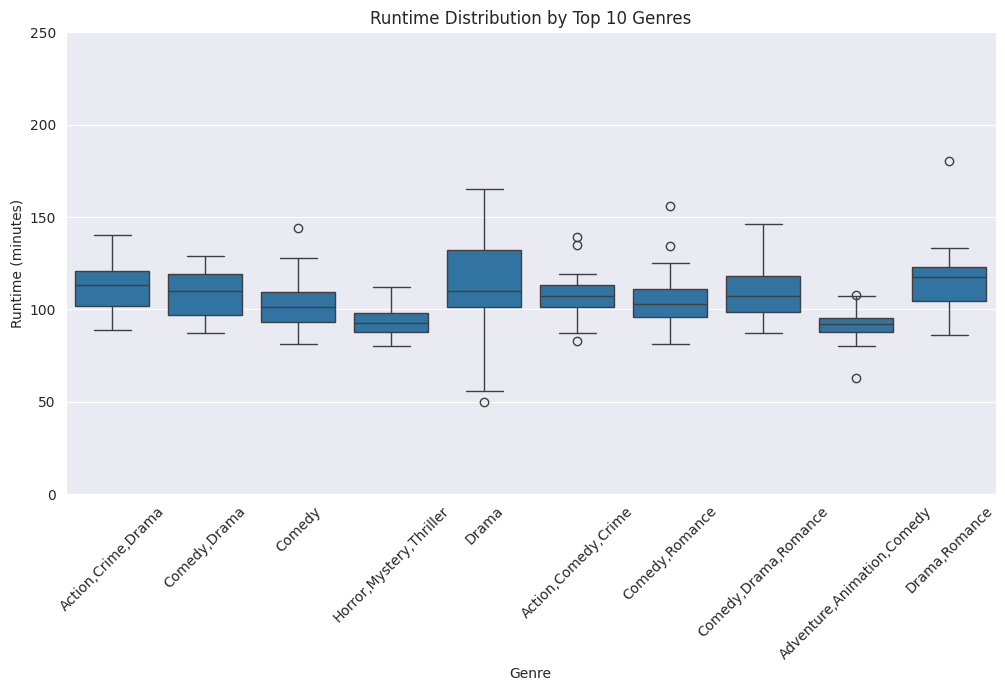

In [233]:
top_genres = Clean_data['genres'].value_counts().head(10).index
movies_top_genres = Clean_data[Clean_data['genres'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(x='genres', y='runtime_minutes', data=movies_top_genres)
plt.xticks(rotation=45)
plt.ylim(0, 250)  # Optional: limit to avoid extreme outliers
plt.title('Runtime Distribution by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()

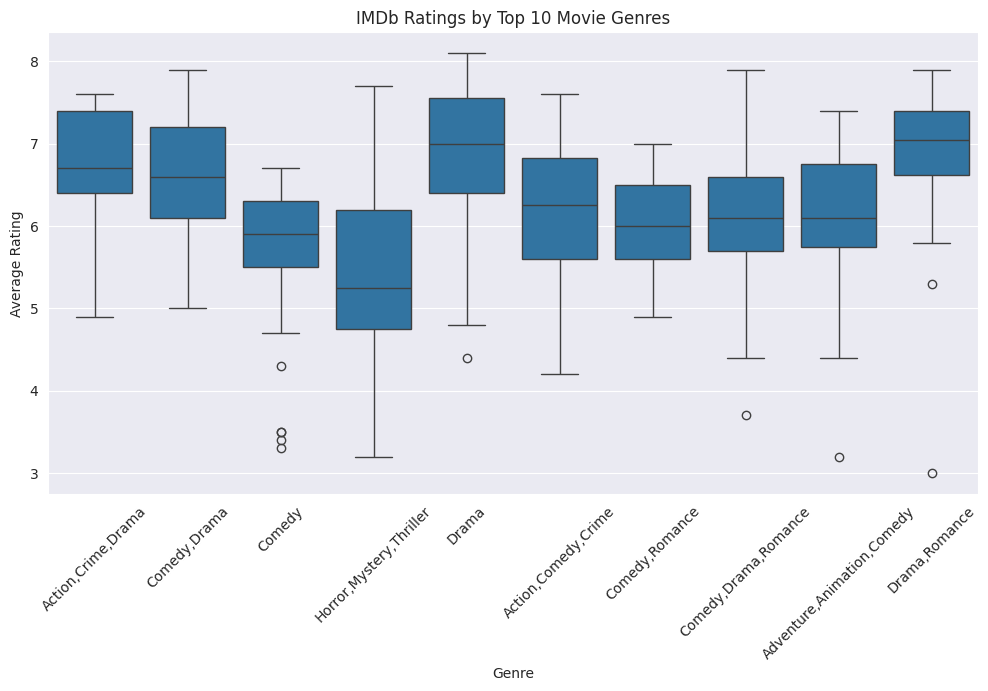

In [239]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genres', y='averagerating', data=df_top_genres)
plt.xticks(rotation=45)
plt.title('IMDb Ratings by Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


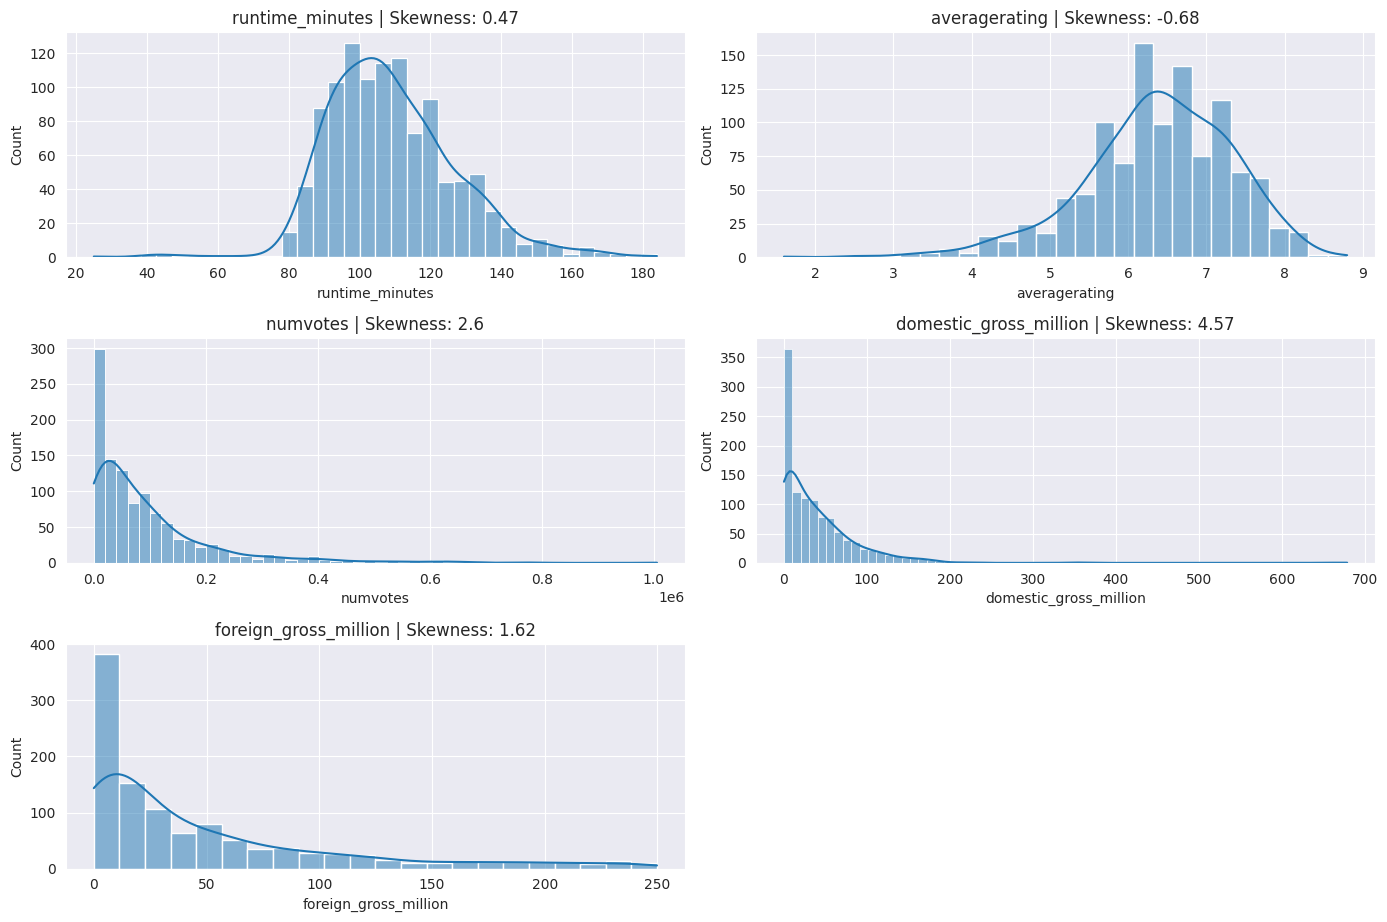

In [243]:
sns.set_style("darkgrid")

numerical_columns = Clean_data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(Clean_data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(Clean_data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

What are the shortest and longest episodes

In [247]:
Clean_data.nlargest(5, 'runtime_minutes')[['primary_title','runtime_minutes']]
Clean_data.nsmallest(5, 'runtime_minutes')[['primary_title','runtime_minutes']]

,primary_title,runtime_minutes
49175,The Call,25.0
54321,Journey to the South Pacific,40.0
8837,Sea Rex 3D: Journey to a Prehistoric World,41.0
38579,Jerusalem,44.0
47187,A Beautiful Planet,46.0


What are the most frequent genres

In [248]:
Clean_data['genres'].str.split(',').explode().value_counts().head(10)

,count
genres,
Drama,576
Comedy,422
Action,306
Adventure,213
Thriller,194
Crime,185
Romance,173
Biography,118
Horror,106


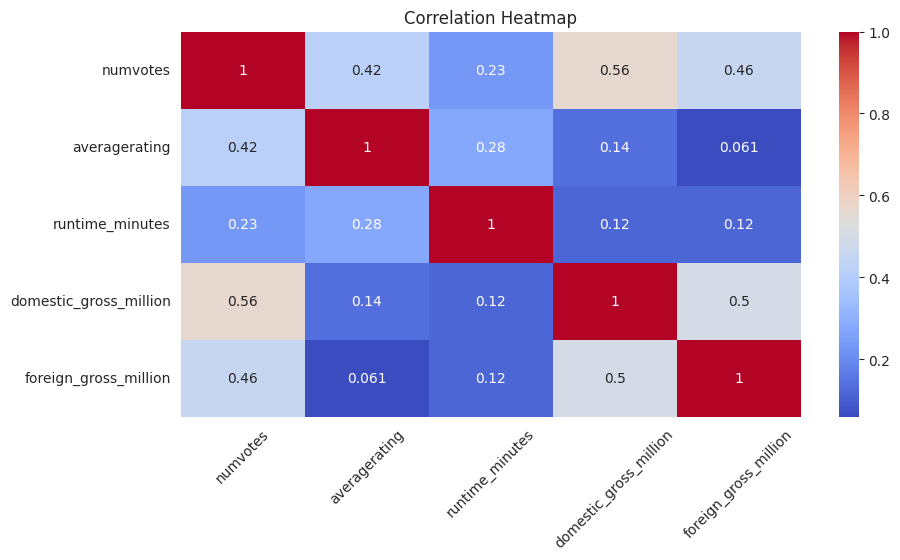

In [258]:
plt.figure(figsize=(10,5))
sns.heatmap(Clean_data[['numvotes', 'averagerating', 'runtime_minutes', 'domestic_gross_million','foreign_gross_million']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

**NEW FEATURES**

In [327]:
Clean_data['total_gross_million'] = Clean_data['domestic_gross_million'] + Clean_data['foreign_gross_million']
Clean_data['intl_share'] = Clean_data['foreign_gross_million'] / Clean_data['total_gross_million']

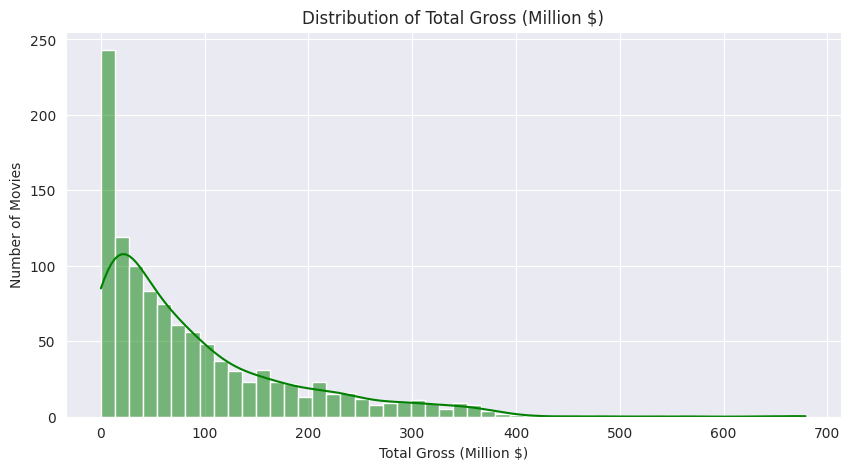

In [329]:
plt.figure(figsize=(10,5))
sns.histplot(Clean_data['total_gross_million'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Gross (Million $)')
plt.xlabel('Total Gross (Million $)')
plt.ylabel('Number of Movies')
plt.show()

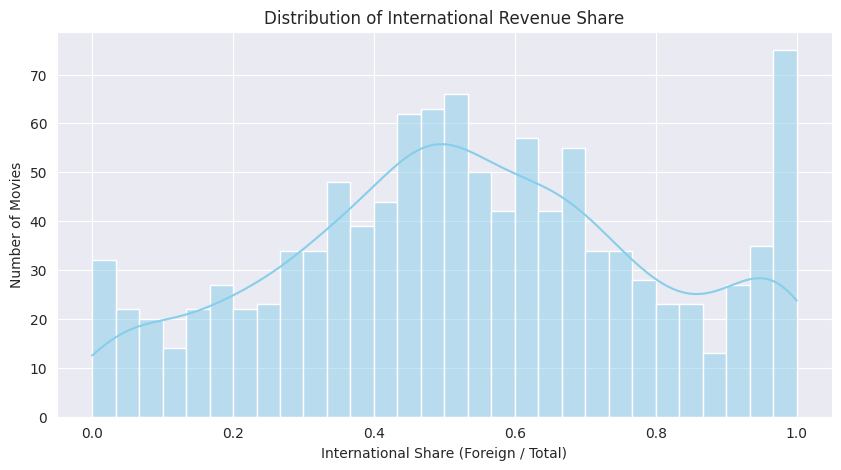

In [330]:
plt.figure(figsize=(10,5))
sns.histplot(Clean_data['intl_share'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of International Revenue Share')
plt.xlabel('International Share (Foreign / Total)')
plt.ylabel('Number of Movies')
plt.show()

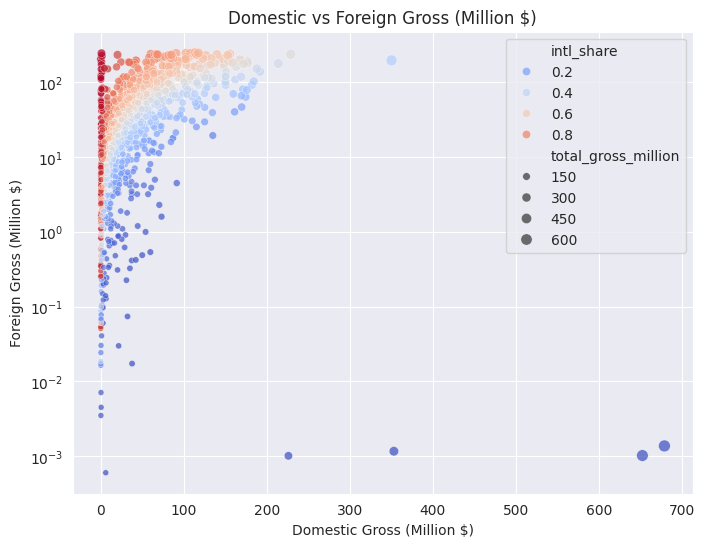

In [331]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=Clean_data,
    x='domestic_gross_million',
    y='foreign_gross_million',
    hue='intl_share',
    size='total_gross_million',
    palette='coolwarm',
    alpha=0.7
)

plt.title('Domestic vs Foreign Gross (Million $)')
plt.xlabel('Domestic Gross (Million $)')
plt.ylabel('Foreign Gross (Million $)')
plt.yscale('log')
plt.show()


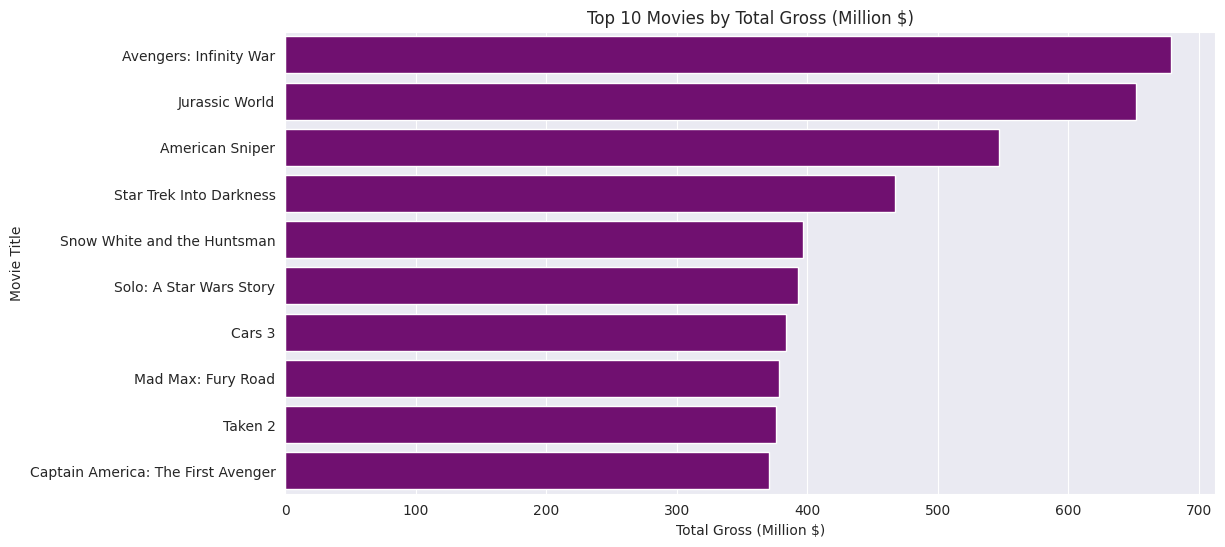

In [333]:
top10 = Clean_data.nlargest(10, 'total_gross_million')

plt.figure(figsize=(12,6))
sns.barplot(x='total_gross_million', y='primary_title', data=top10, color='purple')
plt.title('Top 10 Movies by Total Gross (Million $)')
plt.xlabel('Total Gross (Million $)')
plt.ylabel('Movie Title')
plt.show()

In [335]:
Clean_data['studio'].value_counts()

,count
studio,
Uni.,106
Fox,85
WB,80
Sony,67
LGF,61
...,...
JBG,1
BBC,1
Grindstone,1


- There was a positive correlation between domestic costs and the number of votes indicating that most clients prefer local genres rates.
- However, foreign rates were equaly voted for.
- Average rating was better with runtime and domestic rates compared to foreign rates


Recommendations
1. Drama and comedy movies would be the most appropriate to produce
2. The movie runtime_minutes influences the average ration
3. Foreign and domestic rates have 50 percent correlation meaning there isn't any significant difference between them
4. Uni could be the best studio to work with